# 02 - Pupil Center

In [26]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Load an image of opened eye
img = load_img('open/openedEye0.jpg',grayscale=True)
x = img_to_array(img)  # this is a Numpy array with shape (260, 400, 1)
x = x.reshape((x.shape[:2])) # this is a Numpy array with shape (260, 400)

# Display it
import matplotlib.pyplot as plt
plt.imshow(x/255., cmap='gray')
plt.show()

/home/vince/.local/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [27]:
import numpy as np
# Load all images opened eye
X = np.zeros((480,260*400))

for i in range(480):
    filename = 'open/openedEye'+str(i)+'.jpg'
    img = load_img(filename, grayscale=True)
    x = img_to_array(img)
    x = x.reshape((np.prod(x.shape[:2])))
    X[i] = x
    
X.shape

(480, 104000)

In [28]:
# Scale the data
X = X/255.

In [29]:
# Read target values
import pandas as pd
target = pd.read_csv('open/dataPupilCenter.csv')
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
id          480 non-null int64
xcentral    480 non-null object
ycentral    480 non-null object
dtypes: int64(1), object(2)
memory usage: 11.3+ KB


In [30]:
# Remove missing values
X = X[target.xcentral != '?']
target = target[target.xcentral != '?']
target = target.astype('float32')
target.shape

(431, 3)

In [31]:
# Drop the first column
target = target.drop(columns=['id'])
# Rescale the other columns
target['xcentral'] = target['xcentral']/400
target['ycentral'] = target['ycentral']/260
target.describe()

,xcentral,ycentral
count,431.000000,431.000000
mean,0.562320,0.529761
std,0.172145,0.190224
min,0.202500,0.061538
25%,0.420000,0.428846
50%,0.550000,0.515385
75%,0.666250,0.657692
max,0.967500,0.996154


In [32]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.20, random_state=42)

In [47]:
# Create your model 
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers


# Create the function model
def model(input_dim, regul=0):

    model = Sequential()

    # Add the first Dense layers of 100 units with the input dimension
    model.add(Dense(100, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(regul)))

    # Add more layers of 100 units with regularization
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))

    # Add finally the output layer with one unit: the predicted result
    model.add(Dense(2, activation='linear', kernel_regularizer=regularizers.l2(regul)))
    
    return model

In [48]:
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard

# Define the model with regularization
model = model(input_dim=np.prod(X_train.shape[1:]), regul=0.00)
model.compile(optimizer='adam', loss='mean_squared_error')

# Define now our callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

# Finally fit the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=callbacks)

Train on 344 samples, validate on 87 samples
Epoch 1/500
344/344 [==============================] - 2s 5ms/step - loss: 17.8143 - val_loss: 1.0945
Epoch 2/500
344/344 [==============================] - 1s 3ms/step - loss: 1.6525 - val_loss: 2.3943
Epoch 3/500
344/344 [==============================] - 1s 3ms/step - loss: 1.2549 - val_loss: 0.1661
Epoch 4/500
344/344 [==============================] - 1s 4ms/step - loss: 0.4454 - val_loss: 0.1523
Epoch 5/500
344/344 [==============================] - 1s 3ms/step - loss: 0.2409 - val_loss: 0.1992
Epoch 6/500
344/344 [==============================] - 1s 3ms/step - loss: 0.1258 - val_loss: 0.1246
Epoch 7/500
344/344 [==============================] - 1s 3ms/step - loss: 0.1072 - val_loss: 0.1351
Epoch 8/500
344/344 [==============================] - 1s 3ms/step - loss: 0.0738 - val_loss: 0.0438
Epoch 9/500
344/344 [==============================] - 1s 3ms/step - loss: 0.0465 - val_loss: 0.0386
Epoch 10/500
344/344 [=======================

Epoch 81/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0128 - val_loss: 0.0140
Epoch 82/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0203 - val_loss: 0.0112
Epoch 83/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0159 - val_loss: 0.0284
Epoch 84/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0215 - val_loss: 0.0263
Epoch 85/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0181 - val_loss: 0.0112
Epoch 86/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0223 - val_loss: 0.0070
Epoch 87/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0205 - val_loss: 0.0197
Epoch 88/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0176 - val_loss: 0.0302
Epoch 89/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0223 - val_loss: 0.0170
Epoch 90/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0172

344/344 [==============================] - 1s 4ms/step - loss: 0.0184 - val_loss: 0.0141
Epoch 161/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0154 - val_loss: 0.0147
Epoch 162/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0128 - val_loss: 0.0096
Epoch 163/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0160 - val_loss: 0.0106
Epoch 164/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0082 - val_loss: 0.0097
Epoch 165/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0061 - val_loss: 0.0078
Epoch 166/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0058 - val_loss: 0.0103
Epoch 167/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0059 - val_loss: 0.0073
Epoch 168/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 169/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0054 - v

344/344 [==============================] - 1s 4ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 240/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 241/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 242/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 243/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 244/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 245/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 0.0063
Epoch 246/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 247/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0049 - val_loss: 0.0029
Epoch 248/500
344/344 [==============================] - 1s 4ms/step - loss: 0.0023 - v

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


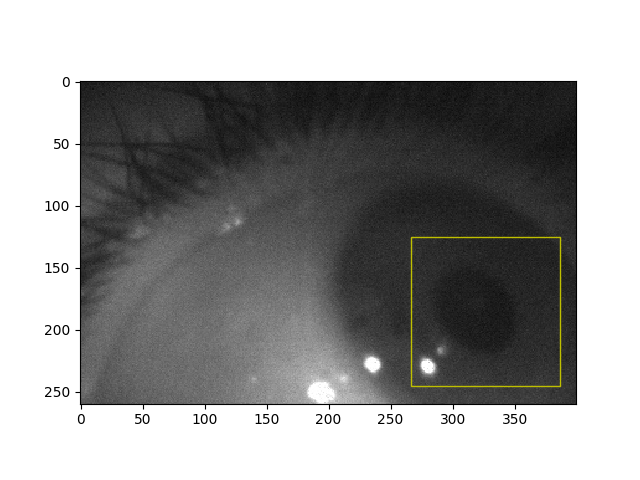

In [58]:
# Display the results for some eyes
import matplotlib.patches as patches

%matplotlib notebook
index = 2
y_pred_test = model.predict(X_test)

# Image to display
display = np.reshape(X_test[index], (260,400))
box = y_pred_test[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

In [ ]:
# Can perform data augmentation to improve results
# For example here by flipping horizontally
X_train_Flipped = np.flip(X_train, axis=2)

y_train_flipped = np.zeros(y_train.shape)
y_train_flipped[:,0] = 1-y_train[:,0]
y_train_flipped[:,1] = y_train[:,1]

X_augment = np.concatenate((X_train, X_train_Flipped), axis=0)
y_train_augment = np.concatenate((y_train, y_train_flipped), axis=0)
